<a href="https://colab.research.google.com/github/Gidion98/Streamlit/blob/main/NBC_LDA_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pertama Instal package yang diperlukan

In [57]:
! pip install --user scipy wordcloud nltk seaborn textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Import Packagenya dan mount pada google drive untuk mengambil dataset yang diperlukan

In [58]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
# nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pastikan dataset tidak berbentuk UTF-8 encoding

In [59]:
total_data = pd.read_csv("/content/drive/My Drive/Copy/Copy of DataSet1.csv", encoding="ISO-8859-1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Import Contraction**

In [60]:
with open('/content/drive/My Drive/Copy/Copy of contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Seting DataFrame Pandas untuk menapilkan tabel yang tidak terpotong

In [61]:
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Melihat DataSet

In [62]:
total_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,content,score
0,00046643-0edd-48d2-85f5-a3e4301ff425,"The App is okay. The only problem is, you allow Sellers that send wrong items. I ordered Jean and i received Pink Purse. After i rate the Seller i see that there are many reviews same as my review. It seems that the seller intentionally send wrong items for bigger profit. Since theres no warranty. And you cant report scammer Sellers . I hope you add a system to remove those Scammer Sellers like a Report Seller Option. Please work for this. We are paying right for the wrong item.",2
1,000c3ae0-f70b-4740-a17d-971b2d7af745,"He's good, in case the others you ordered, then that's not what's coming",2
2,0012c1f2-5a2a-4ba7-b51a-8d13091da1ba,"I bought 2 items in the same IDcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from Lazada for the missing product 2 weeks ago.. Untill now no answer regarding to my refund request!!!",4
3,0016ad20-3496-4cdd-9b82-22badbe03e64,its to good to be through,3
4,0017961d-5c9b-4fe9-a262-400a58f1a331,wide range of choices but still have a lot to do in screening products based on quality.,4
5,0017b1e6-80e0-4109-97f1-f90afb859a5b,good but shipping fee kills sometimes ?????????????,3
6,001aa187-f6dc-4d7a-bb8b-d0a0eb353963,"Easy to order, should allow to save more than 200 items in Like.",4
7,0022c866-389e-4dfa-948f-6db3ee3779f1,The new updatw made my laz games a bit difficult to access... kindly check on the system. Thank you,4
8,00268c7b-e027-4b03-ad74-2d911ece6804,I hate when i received message from a seller that i didn't follow everyday...the blacklisted option doesn't work cause keep getting messages from the seller i already blacklisted...fix this issues I don't want to receive any messages from seller i didn't follow....,1
9,0056231e-0bb9-472f-aad7-e861f9bdbabf,"It lags even if the wifi net is good, the navigation of lazvlive stramers are harder to find. The shipping is slow, but over all its great.",4


Mengambil nama kolom menjadi variable

In [63]:
review = total_data.columns.values[1]
sentiment = total_data.columns.values[2]
review, sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('content', 'score')

In [64]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  15000 non-null  object
 1   content   15000 non-null  object
 2   score     15000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1) Pre-Processing

  -> Mengklasifikasikan emotikon

In [65]:
def emoji(review):
    # Senyum -- :), : ), :-), (:, ( :, (-:, :') , :O
    review = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review)
    # Tertawa -- :D, : D, :-D, xD, x-D, XD, X-D
    review = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review)
    # Cinta -- <3, :*
    review = re.sub(r'(<3|:\*)', ' positiveemoji ', review)
    # Berkedip -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review)
    # Sedih -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review)
    # Menangis -- :,(, :'(, :"(
    review = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review)
    return review

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-> Menentukan fungsi yang akan melakukan PreProcess pada review (Lower Case)

In [66]:
import re

def process_review(review):
    if isinstance(review, str):
        review = review.lower()
        review = re.sub('@[^\s]+', '', review)
        review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)
        review = re.sub(r"\d+", " ", review)
        review = re.sub('&quot;', " ", review)
        review = emoji(review)
        review = re.sub(r"\b[a-zA-Z]\b", "", review)
        for word in review.split():
            if word.lower() in contractions:
                review = review.replace(word, contractions[word.lower()])
        review = re.sub(r"[^\w\s]", " ", review)
        review = re.sub(r'(.)\1+', r'\1\1', review)
        review = re.sub(r"\s+", " ", review)
    else:
        review = np.nan  # or any other desired value for missing reviews
    return review

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-66-45df5aff9f1b>:6: DeprecationWarning: invalid escape sequence '\s'
  review = re.sub('@[^\s]+', '', review)
<ipython-input-66-45df5aff9f1b>:7: DeprecationWarning: invalid escape sequence '\.'
  review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)


-> Buat kolom baru untuk membandingkan review lama dengan review baru

In [67]:
total_data['processed_review'] = np.vectorize(process_review)(total_data[review])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Membandingkan data awal dengan data yang sudah dirubah**

In [68]:
total_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,content,score,processed_review
0,00046643-0edd-48d2-85f5-a3e4301ff425,"The App is okay. The only problem is, you allow Sellers that send wrong items. I ordered Jean and i received Pink Purse. After i rate the Seller i see that there are many reviews same as my review. It seems that the seller intentionally send wrong items for bigger profit. Since theres no warranty. And you cant report scammer Sellers . I hope you add a system to remove those Scammer Sellers like a Report Seller Option. Please work for this. We are paying right for the wrong item.",2,the app is okay the only problem is you allow sellers that send wrong items ordered jean and received pink purse after rate the seller see that there are many reviews same as my review it seems that the seller intentionally send wrong items for bigger profit since theres no warranty and you cant report scammer sellers hope you add system to remove those scammer sellers like report seller option please work for this we are paying right for the wrong item
1,000c3ae0-f70b-4740-a17d-971b2d7af745,"He's good, in case the others you ordered, then that's not what's coming",2,he good in case the others you ordered then that not what coming
2,0012c1f2-5a2a-4ba7-b51a-8d13091da1ba,"I bought 2 items in the same IDcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from Lazada for the missing product 2 weeks ago.. Untill now no answer regarding to my refund request!!!",4,bought items in the same idcode only one item was delivered to me another was missing in transhipment from what seller said then requested refund from lazada for the missing product weeks ago untill now no answer regarding to my refund request
3,0016ad20-3496-4cdd-9b82-22badbe03e64,its to good to be through,3,its to good to be through
4,0017961d-5c9b-4fe9-a262-400a58f1a331,wide range of choices but still have a lot to do in screening products based on quality.,4,wide range of choices but still have lot to do in screening products based on quality
5,0017b1e6-80e0-4109-97f1-f90afb859a5b,good but shipping fee kills sometimes ?????????????,3,good but shipping fee kills sometimes
6,001aa187-f6dc-4d7a-bb8b-d0a0eb353963,"Easy to order, should allow to save more than 200 items in Like.",4,easy to order should allow to save more than items in like
7,0022c866-389e-4dfa-948f-6db3ee3779f1,The new updatw made my laz games a bit difficult to access... kindly check on the system. Thank you,4,the new updatw made my laz games bit difficult to access kindly check on the system thank you
8,00268c7b-e027-4b03-ad74-2d911ece6804,I hate when i received message from a seller that i didn't follow everyday...the blacklisted option doesn't work cause keep getting messages from the seller i already blacklisted...fix this issues I don't want to receive any messages from seller i didn't follow....,1,hate when received message from seller that didn follow everyday the blacklisted option doesn work cause keep getting messages from the seller already blacklisted fix this issues don want to receive any messages from seller didn follow
9,0056231e-0bb9-472f-aad7-e861f9bdbabf,"It lags even if the wifi net is good, the navigation of lazvlive stramers are harder to find. The shipping is slow, but over all its great.",4,it lags even if the wifi net is good the navigation of lazvlive stramers are harder to find the shipping is slow but over all its great


Stemming

In [69]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# total_data = total_data.apply(lambda x: [stemmer.stem(i) for i in x])
# total_data.head(10)

total_data = total_data.apply(lambda x: [stemmer.stem(i) if isinstance(i, str) else i for i in x])
total_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,content,score,processed_review
0,00046643-0edd-48d2-85f5-a3e4301ff425,"the app is okay. the only problem is, you allow sellers that send wrong items. i ordered jean and i received pink purse. after i rate the seller i see that there are many reviews same as my review. it seems that the seller intentionally send wrong items for bigger profit. since theres no warranty. and you cant report scammer sellers . i hope you add a system to remove those scammer sellers like a report seller option. please work for this. we are paying right for the wrong item.",2,the app is okay the only problem is you allow sellers that send wrong items ordered jean and received pink purse after rate the seller see that there are many reviews same as my review it seems that the seller intentionally send wrong items for bigger profit since theres no warranty and you cant report scammer sellers hope you add system to remove those scammer sellers like report seller option please work for this we are paying right for the wrong item
1,000c3ae0-f70b-4740-a17d-971b2d7af745,"he's good, in case the others you ordered, then that's not what's com",2,he good in case the others you ordered then that not what com
2,0012c1f2-5a2a-4ba7-b51a-8d13091da1ba,"i bought 2 items in the same idcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from lazada for the missing product 2 weeks ago.. untill now no answer regarding to my refund request!!!",4,bought items in the same idcode only one item was delivered to me another was missing in transhipment from what seller said then requested refund from lazada for the missing product weeks ago untill now no answer regarding to my refund request
3,0016ad20-3496-4cdd-9b82-22badbe03e64,its to good to be through,3,its to good to be through
4,0017961d-5c9b-4fe9-a262-400a58f1a331,wide range of choices but still have a lot to do in screening products based on quality.,4,wide range of choices but still have lot to do in screening products based on quality
5,0017b1e6-80e0-4109-97f1-f90afb859a5b,good but shipping fee kills sometimes ?????????????,3,good but shipping fee kills sometimes
6,001aa187-f6dc-4d7a-bb8b-d0a0eb353963,"easy to order, should allow to save more than 200 items in like.",4,easy to order should allow to save more than items in like
7,0022c866-389e-4dfa-948f-6db3ee3779f1,the new updatw made my laz games a bit difficult to access... kindly check on the system. thank y,4,the new updatw made my laz games bit difficult to access kindly check on the system thank y
8,00268c7b-e027-4b03-ad74-2d911ece6804,i hate when i received message from a seller that i didn't follow everyday...the blacklisted option doesn't work cause keep getting messages from the seller i already blacklisted...fix this issues i don't want to receive any messages from seller i didn't follow....,1,hate when received message from seller that didn follow everyday the blacklisted option doesn work cause keep getting messages from the seller already blacklisted fix this issues don want to receive any messages from seller didn follow
9,0056231e-0bb9-472f-aad7-e861f9bdbabf,"it lags even if the wifi net is good, the navigation of lazvlive stramers are harder to find. the shipping is slow, but over all its great.",4,it lags even if the wifi net is good the navigation of lazvlive stramers are harder to find the shipping is slow but over all its great


Stopword removing

In [70]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
            "you", "your", "yours", "yourself", "yourselves", "he", "him",
            "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
            "which", "who", "whom", "this", "that", "these", "those", "am", "is",
            "are", "was", "were", "be", "been", "being", "have", "has", "had",
            "having", "do", "does", "did", "doing", "a", "an", "the", "and",
            "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through",
            "during", "before", "after", "above", "below", "to", "from", "up",
            "down", "in", "out", "on", "off", "over", "under", "again", "further",
            "then", "once", "here", "there", "when", "where", "why", "how", "all",
            "any", "both", "each", "few", "more", "most", "other", "some", "such",
            "only", "own", "same", "so", "than", "too", "very",
            "can", "will", "just", "should", "now", "hate"}
print(stop_words)

{'against', 'them', 'was', 'theirs', 'himself', 'any', 'are', 'such', 'had', 'most', 'those', 'yourselves', 'themselves', 'be', 'when', 'between', 'just', 'herself', 'who', 'then', 'we', 'should', 'been', 'an', 'each', 'this', 'again', 'am', 'she', 'above', 'once', 'his', 'does', 'which', 'have', 'having', 'into', 'with', 'and', 'of', 'in', 'under', 'hate', 'all', 'a', 'hers', 'here', 'out', 'down', 'that', 'further', 'you', 'me', 'for', 'same', 'by', 'than', 'it', 'about', 'there', 'her', 'where', 'because', 'some', 'more', 'from', 'him', 'itself', 'to', 'as', 'ours', 'off', 'too', 'can', 'its', 'yours', 'your', 'were', 'what', 'my', 'their', 'while', 'now', 'over', 'being', 'until', 'he', 'other', 'has', 'why', 'myself', 'few', 'during', 'i', 'the', 'on', 'so', 'doing', 'whom', 'own', 'is', 'before', 'very', 'our', 'at', 'ourselves', 'these', 'did', 'up', 'they', 'yourself', 'if', 'will', 'do', 'only', 'both', 'below', 'after', 'or', 'through', 'how', 'but'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bagi menjadi 3 kelas

In [71]:
from textblob import TextBlob

def sentiment_analysis(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
total_data['sentiment'] = total_data['processed_review'].apply(sentiment_analysis)
total_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,content,score,processed_review,sentiment
0,00046643-0edd-48d2-85f5-a3e4301ff425,"the app is okay. the only problem is, you allow sellers that send wrong items. i ordered jean and i received pink purse. after i rate the seller i see that there are many reviews same as my review. it seems that the seller intentionally send wrong items for bigger profit. since theres no warranty. and you cant report scammer sellers . i hope you add a system to remove those scammer sellers like a report seller option. please work for this. we are paying right for the wrong item.",2,the app is okay the only problem is you allow sellers that send wrong items ordered jean and received pink purse after rate the seller see that there are many reviews same as my review it seems that the seller intentionally send wrong items for bigger profit since theres no warranty and you cant report scammer sellers hope you add system to remove those scammer sellers like report seller option please work for this we are paying right for the wrong item,negative
1,000c3ae0-f70b-4740-a17d-971b2d7af745,"he's good, in case the others you ordered, then that's not what's com",2,he good in case the others you ordered then that not what com,positive
2,0012c1f2-5a2a-4ba7-b51a-8d13091da1ba,"i bought 2 items in the same idcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from lazada for the missing product 2 weeks ago.. untill now no answer regarding to my refund request!!!",4,bought items in the same idcode only one item was delivered to me another was missing in transhipment from what seller said then requested refund from lazada for the missing product weeks ago untill now no answer regarding to my refund request,negative
3,0016ad20-3496-4cdd-9b82-22badbe03e64,its to good to be through,3,its to good to be through,positive
4,0017961d-5c9b-4fe9-a262-400a58f1a331,wide range of choices but still have a lot to do in screening products based on quality.,4,wide range of choices but still have lot to do in screening products based on quality,negative
5,0017b1e6-80e0-4109-97f1-f90afb859a5b,good but shipping fee kills sometimes ?????????????,3,good but shipping fee kills sometimes,positive
6,001aa187-f6dc-4d7a-bb8b-d0a0eb353963,"easy to order, should allow to save more than 200 items in like.",4,easy to order should allow to save more than items in like,positive
7,0022c866-389e-4dfa-948f-6db3ee3779f1,the new updatw made my laz games a bit difficult to access... kindly check on the system. thank y,4,the new updatw made my laz games bit difficult to access kindly check on the system thank y,positive
8,00268c7b-e027-4b03-ad74-2d911ece6804,i hate when i received message from a seller that i didn't follow everyday...the blacklisted option doesn't work cause keep getting messages from the seller i already blacklisted...fix this issues i don't want to receive any messages from seller i didn't follow....,1,hate when received message from seller that didn follow everyday the blacklisted option doesn work cause keep getting messages from the seller already blacklisted fix this issues don want to receive any messages from seller didn follow,negative
9,0056231e-0bb9-472f-aad7-e861f9bdbabf,"it lags even if the wifi net is good, the navigation of lazvlive stramers are harder to find. the shipping is slow, but over all its great.",4,it lags even if the wifi net is good the navigation of lazvlive stramers are harder to find the shipping is slow but over all its great,positive


Tokenisasi

In [73]:
tokenized_review = total_data['processed_review'].apply(lambda x: x.split())
tokenized_review.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [the, app, is, okay, the, only, problem, is, you, allow, sellers, that, send, wrong, items, ordered, jean, and, received, pink, purse, after, rate, the, seller, see, that, there, are, many, reviews, same, as, my, review, it, seems, that, the, seller, intentionally, send, wrong, items, for, bigger, profit, since, theres, no, warranty, and, you, cant, report, scammer, sellers, hope, you, add, system, to, remove, those, scammer, sellers, like, report, seller, option, please, work, for, this, we, are, paying, right, for, the, wrong, item]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Pie Chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


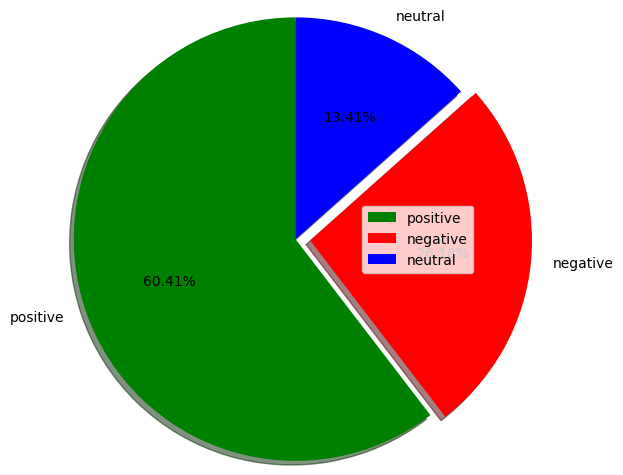

In [74]:
sentiment_counts = total_data['sentiment'].value_counts()
sentiments = sentiment_counts.index.tolist()
slices = sentiment_counts.values.tolist()
colors = ['g', 'r', 'b']

fig, ax = plt.subplots()
ax.pie(slices, labels=sentiments, colors=colors, startangle=90, shadow=True,
       explode=(0, 0.1, 0), radius=1.5, autopct='%1.2f%%')
ax.legend()

plt.show()

-> Kata Positif

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<Figure size 3840x2880 with 0 Axes>

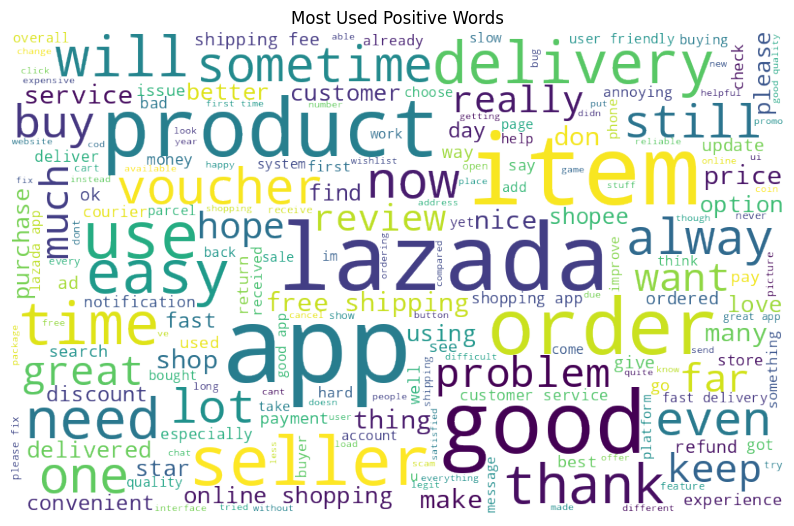

In [75]:
positive_words =' '.join([text for text in total_data['processed_review'][total_data[sentiment] !=1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('/content/drive/My Drive/Copy/Copy of positive_words.png')
plt.show()

-> Kata Negatif

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<Figure size 3840x2880 with 0 Axes>

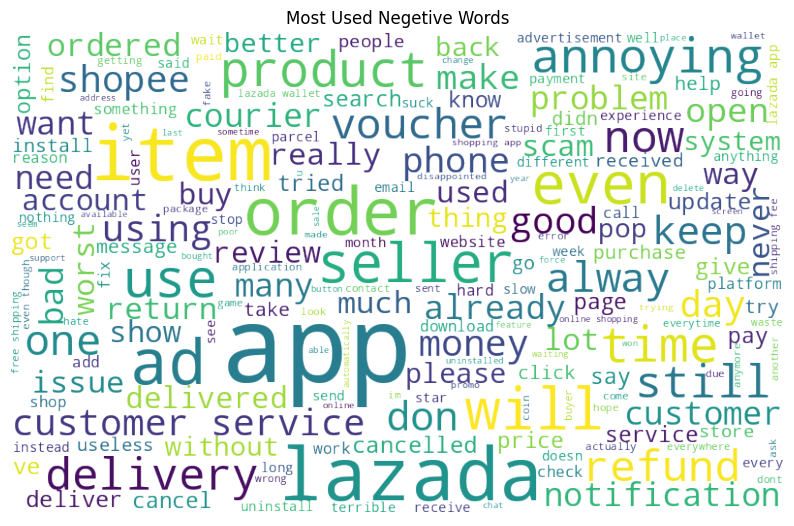

In [76]:
negetive_words =' '.join([text for text in total_data['processed_review'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('/content/drive/My Drive/Copy/Copy of negetive_words.png')
plt.show()

Tf-Idf

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(total_data['processed_review'])

feature_names = tf_idf_vectorizer.get_feature_names_out()

for doc_idx, doc in enumerate(final_vectorized_data):
    print("Document ", doc_idx + 1)
    count = 0
    for feature_idx, tfidf_score in zip(doc.indices, doc.data):
        print(feature_names[feature_idx], ": ", tfidf_score)
        count += 1
        if count >= 30:
            break
    if count >= 30:
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document  1
the wrong item :  0.06089343276981106
for the wrong :  0.07876348166792912
right for the :  0.07876348166792912
paying right for :  0.07876348166792912
are paying right :  0.07554502668450204
we are paying :  0.06881944175332506
this we are :  0.07876348166792912
for this we :  0.07876348166792912
work for this :  0.07876348166792912
please work for :  0.07876348166792912
option please work :  0.07876348166792912
seller option please :  0.07876348166792912
report seller option :  0.07876348166792912
like report seller :  0.07876348166792912
sellers like report :  0.07876348166792912
scammer sellers like :  0.07876348166792912
those scammer sellers :  0.07876348166792912
remove those scammer :  0.07876348166792912
to remove those :  0.07326149653305414
system to remove :  0.07876348166792912
add system to :  0.07876348166792912
you add system :  0.07876348166792912
hope you add :  0.07326149653305414
sellers hope you :  0.07876348166792912
scammer sellers hope :  0.078763481

Bagi data untuk mengecek tingkat keakurasiannya

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data['sentiment'],
                                                    test_size=0.2, random_state=69)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cetak dataset yang sudah dibagi

In [79]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (12000, 422501)
X_test_shape :  (3000, 422501)
y_train_shape :  (12000,)
y_test_shape :  (3000,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cetak Confusion Matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


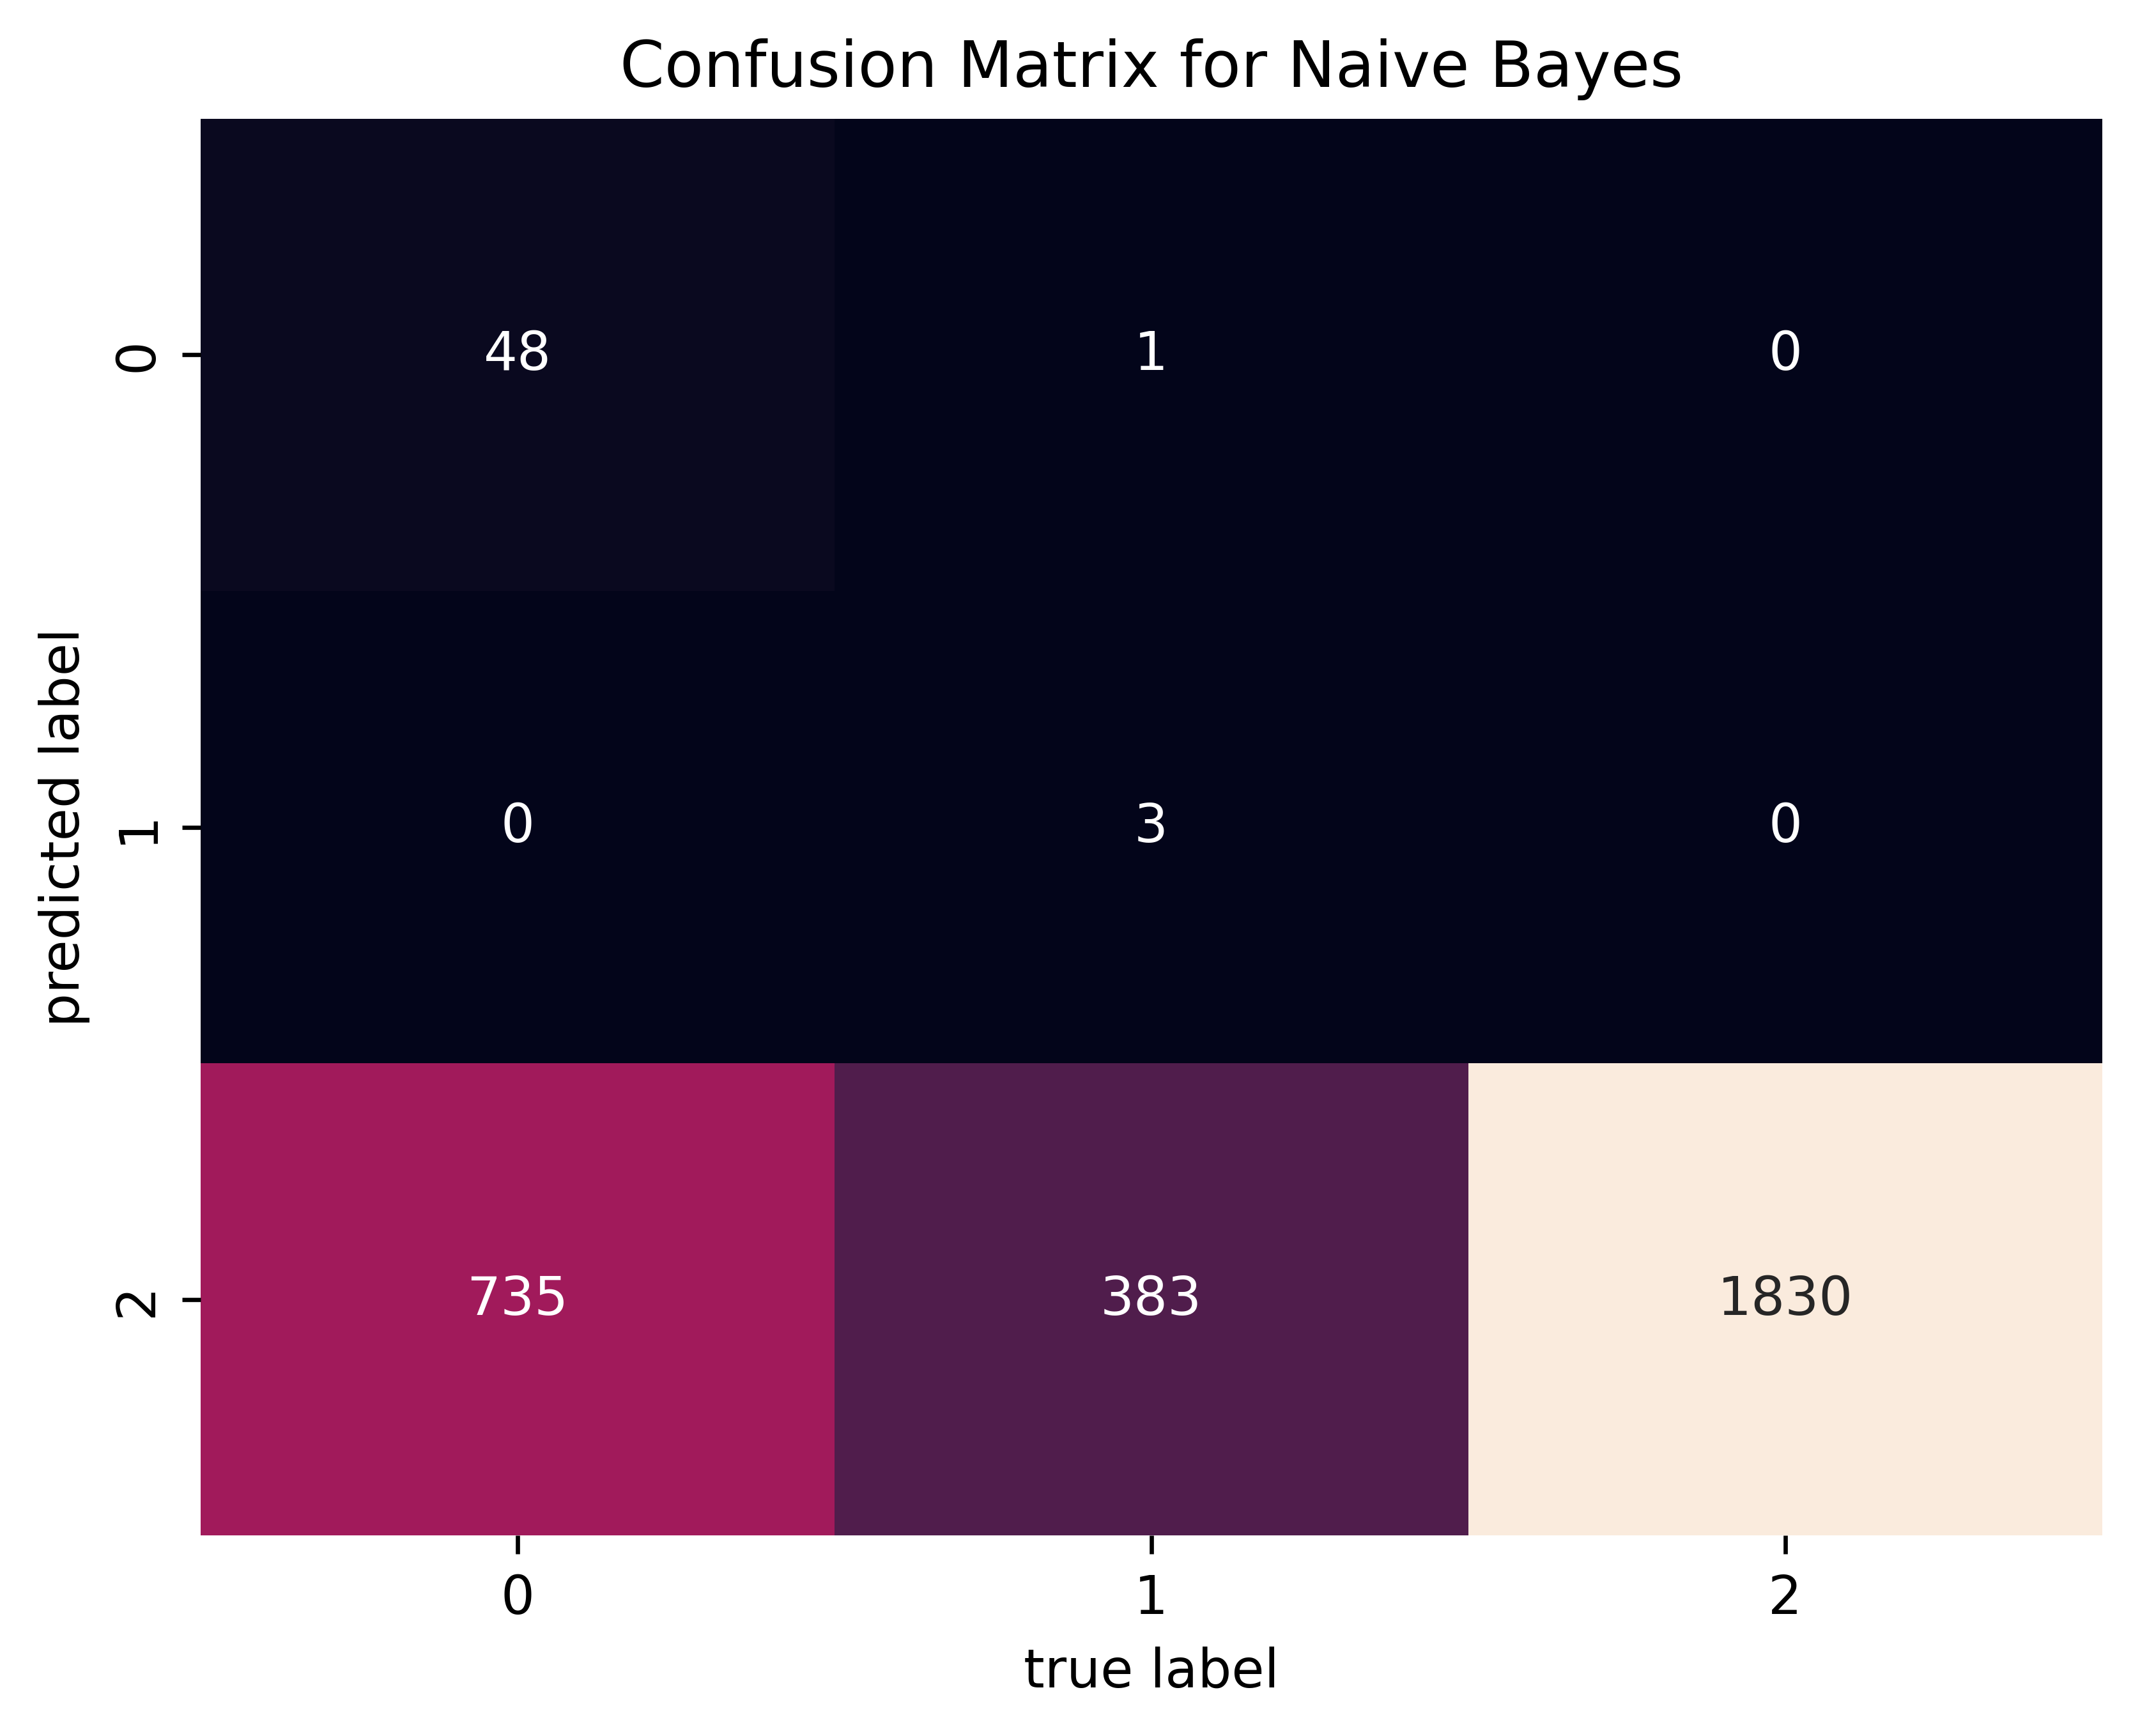

In [81]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("/content/drive/My Drive/Copy/Copy of confusion_matrix.png")
plt.show()

Cek tingkat ke Akurasian, Precision, Recall, and F-Measure

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

score_naive = accuracy_score(predicted_naive, y_test)
precision_naive = precision_score(y_test, predicted_naive, average='weighted')
recall_naive = recall_score(y_test, predicted_naive, average='weighted')
f1_score_naive = f1_score(y_test, predicted_naive, average='weighted')

print("Accuracy with Naive-bayes: ", score_naive)
print("Precision with Naive-bayes: ", precision_naive)
print("Recall with Naive-bayes: ", recall_naive)
print("F-measure with Naive-bayes: ", f1_score_naive)

Accuracy with Naive-bayes:  0.627
Precision with Naive-bayes:  0.7633369700661812
Recall with Naive-bayes:  0.627
F-measure with Naive-bayes:  0.4993666387609878


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    negative       0.98      0.06      0.12       783
     neutral       1.00      0.01      0.02       387
    positive       0.62      1.00      0.77      1830

    accuracy                           0.63      3000
   macro avg       0.87      0.36      0.30      3000
weighted avg       0.76      0.63      0.50      3000



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dari sini sudah LDA

In [84]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
word2vec_model = Word2Vec(tokenized_review, vector_size=200, window=5, min_count=2, sg=1, workers=4)
word2vec_model.train(tokenized_review, total_examples=len(tokenized_review), epochs=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3122728, 4223170)

In [86]:
word2vec_model.wv.most_similar('good')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('satisfying', 0.702853798866272),
 ('excellent', 0.6703243851661682),
 ('varity', 0.6574841141700745),
 ('satisfactory', 0.643604576587677),
 ('convienent', 0.6290169358253479),
 ('diliver', 0.6266019940376282),
 ('okey', 0.6258664131164551),
 ('exceptional', 0.6236602663993835),
 ('materials', 0.6217721700668335),
 ('oriented', 0.6178185939788818)]

In [87]:
word2vec_model.wv.most_similar('bad')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('experiences', 0.4835105538368225),
 ('unsatisfying', 0.480618953704834),
 ('poor', 0.4805472493171692),
 ('awful', 0.4744466245174408),
 ('watchout', 0.47361069917678833),
 ('pleasant', 0.4677027463912964),
 ('horrible', 0.46512696146965027),
 ('unsatisfactory', 0.46447405219078064),
 ('unsatisfied', 0.4629610478878021),
 ('oriented', 0.4624195396900177)]

In [88]:
total_data.head(10) #menampilkan dataframe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,content,score,processed_review,sentiment
0,00046643-0edd-48d2-85f5-a3e4301ff425,"the app is okay. the only problem is, you allow sellers that send wrong items. i ordered jean and i received pink purse. after i rate the seller i see that there are many reviews same as my review. it seems that the seller intentionally send wrong items for bigger profit. since theres no warranty. and you cant report scammer sellers . i hope you add a system to remove those scammer sellers like a report seller option. please work for this. we are paying right for the wrong item.",2,the app is okay the only problem is you allow sellers that send wrong items ordered jean and received pink purse after rate the seller see that there are many reviews same as my review it seems that the seller intentionally send wrong items for bigger profit since theres no warranty and you cant report scammer sellers hope you add system to remove those scammer sellers like report seller option please work for this we are paying right for the wrong item,negative
1,000c3ae0-f70b-4740-a17d-971b2d7af745,"he's good, in case the others you ordered, then that's not what's com",2,he good in case the others you ordered then that not what com,positive
2,0012c1f2-5a2a-4ba7-b51a-8d13091da1ba,"i bought 2 items in the same idcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from lazada for the missing product 2 weeks ago.. untill now no answer regarding to my refund request!!!",4,bought items in the same idcode only one item was delivered to me another was missing in transhipment from what seller said then requested refund from lazada for the missing product weeks ago untill now no answer regarding to my refund request,negative
3,0016ad20-3496-4cdd-9b82-22badbe03e64,its to good to be through,3,its to good to be through,positive
4,0017961d-5c9b-4fe9-a262-400a58f1a331,wide range of choices but still have a lot to do in screening products based on quality.,4,wide range of choices but still have lot to do in screening products based on quality,negative
5,0017b1e6-80e0-4109-97f1-f90afb859a5b,good but shipping fee kills sometimes ?????????????,3,good but shipping fee kills sometimes,positive
6,001aa187-f6dc-4d7a-bb8b-d0a0eb353963,"easy to order, should allow to save more than 200 items in like.",4,easy to order should allow to save more than items in like,positive
7,0022c866-389e-4dfa-948f-6db3ee3779f1,the new updatw made my laz games a bit difficult to access... kindly check on the system. thank y,4,the new updatw made my laz games bit difficult to access kindly check on the system thank y,positive
8,00268c7b-e027-4b03-ad74-2d911ece6804,i hate when i received message from a seller that i didn't follow everyday...the blacklisted option doesn't work cause keep getting messages from the seller i already blacklisted...fix this issues i don't want to receive any messages from seller i didn't follow....,1,hate when received message from seller that didn follow everyday the blacklisted option doesn work cause keep getting messages from the seller already blacklisted fix this issues don want to receive any messages from seller didn follow,negative
9,0056231e-0bb9-472f-aad7-e861f9bdbabf,"it lags even if the wifi net is good, the navigation of lazvlive stramers are harder to find. the shipping is slow, but over all its great.",4,it lags even if the wifi net is good the navigation of lazvlive stramers are harder to find the shipping is slow but over all its great,positive


In [89]:
document = []

for i in range(len(tokenized_review)):
    if len(tokenized_review.iloc[i]) >= 4:
        a=tokenized_review.iloc[i][3]
        document.append(a)

document[0:50]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['okay',
 'case',
 'the',
 'to',
 'choices',
 'fee',
 'should',
 'made',
 'message',
 'if',
 'is',
 'is',
 'in',
 'on',
 'allows',
 'unlike',
 'time',
 'garbage',
 'fix',
 'may',
 'are',
 'to',
 'view',
 'single',
 'change',
 'problem',
 'problem',
 'some',
 'an',
 'rate',
 'are',
 'though',
 'use',
 'notifications',
 'app',
 'be',
 'from',
 'me',
 'option',
 'not',
 'many',
 'gcash',
 'more',
 'me',
 'everywhere',
 'lazada',
 'all',
 'we',
 'through',
 'choic']

In [90]:
doc_clean = tokenized_review
doc_clean[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [the, app, is, okay, the, only, problem, is, you, allow, sellers, that, send, wrong, items, ordered, jean, and, received, pink, purse, after, rate, the, seller, see, that, there, are, many, reviews, same, as, my, review, it, seems, that, the, seller, intentionally, send, wrong, items, for, bigger, profit, since, theres, no, warranty, and, you, cant, report, scammer, sellers, hope, you, add, system, to, remove, those, scammer, sellers, like, report, seller, option, please, work, for, this, we, are, paying, right, for, the, wrong, item]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Proses topic modeling dengan LDA gensim

In [91]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<12155 unique tokens: ['add', 'after', 'allow', 'and', 'app']...>


In [92]:
# Membuat object untuk LDA model menggunakan gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Jalankan dan Uji LDA model pada document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.041*"the" + 0.036*"to" + 0.030*"it" + 0.026*"app" + 0.020*"and" + 0.018*"is" + 0.014*"this" + 0.013*"you" + 0.012*"my" + 0.011*"on"'),
 (1,
  '0.045*"the" + 0.030*"to" + 0.021*"and" + 0.017*"is" + 0.017*"my" + 0.016*"it" + 0.015*"not" + 0.014*"they" + 0.013*"order" + 0.013*"but"'),
 (2,
  '0.036*"and" + 0.034*"the" + 0.030*"to" + 0.024*"good" + 0.022*"is" + 0.017*"of" + 0.017*"lazada" + 0.016*"for" + 0.015*"app" + 0.015*"are"')]

In [94]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

      word  topic_id  importance  word_count
0      the         0    0.041407       17654
1       to         0    0.035524       13864
2       it         0    0.030461        9017
3      app         0    0.026184        6191
4      and         0    0.020145       10769
5       is         0    0.017509        8144
6     this         0    0.014455        4094
7      you         0    0.012604        4896
8       my         0    0.012226        4616
9       on         0    0.011497        3231
10     the         1    0.045034       17654
11      to         1    0.029703       13864
12     and         1    0.020722       10769
13      is         1    0.016818        8144
14      my         1    0.016556        4616
15      it         1    0.015869        9017
16     not         1    0.015212        4379
17    they         1    0.013515        2527
18   order         1    0.013190        1969
19     but         1    0.012701        4739
20     and         2    0.035745       10769
21     the

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
from google.colab import drive
drive.mount('drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [96]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount.csv')
!cp df_imp_wcount.csv "/content/drive/My Drive/Copy/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

print(df_dominant_topic.head(10))

Streaming output truncated to the last 5000 lines.
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.app

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.7888   
1            1               1              0.7374   
2            2               1              0.9833   
3            3               2              0.8732   
4            4               2              0.9529   
5            5               2              0.9001   
6            6               2              0.6435   
7            7               0              0.8176   
8            8               1              0.5272   
9            9               0              0.6124   

                                            Keywords  \
0    the, to, and, is, my, it, not, they, order, but   
1    the, to, and, is, my, it, not, they, order, but   
2    the, to, and, is, my, it, not, they, order, but   
3  and, the, to, good, is, of, lazada, for, app, are   
4  and, the, to, good, is, of, lazada, for, app, are   
5  and, the, to, good, is, of, lazada, for, app, are   
6  and, the, 

<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-97-dcd39201d5dc>:16: FutureWarning: The frame.append method is deprecated and will be removed from p

In [99]:
#simpan ke google drive
df_dominant_topic.to_csv('df_dominant_topic.csv')
!cp df_dominant_topic.csv "/content/drive/My Drive/Copy/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
!pip install pyLDAvis==3.2.1
!pip install pandas==1.5.3

import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# proses ini mungkin agak lama
import pyLDAvis.gensim


if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus,  dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [104]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/My Drive/Copy/ldavis_prepared_'+ str(total_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
# proses ini mungkin agak lama
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.056838  0.110530       1        1  36.972300
1     -0.097869 -0.092574       2        1  33.783591
2      0.154707 -0.017956       3        1  29.244109, topic_info=         Term         Freq        Total Category  logprob  loglift
61       good  3136.000000  3136.000000  Default  30.0000  30.0000
4         app  6036.000000  6036.000000  Default  29.0000  29.0000
113     order  1892.000000  1892.000000  Default  28.0000  28.0000
294  shopping  1455.000000  1455.000000  Default  27.0000  27.0000
109  shipping  1335.000000  1335.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
190  delivery   787.021383  2154.365812   Topic3  -5.0558   0.2225
275      some   701.160172  1281.297181   Topic3  -5.1713   0.6266
148       all   741.589128  1758.475974   Topic3  -5.1152   0.3661
308       can   765.284602  2681.316016   Topic3  -5.0838  -0.0243
47       that   754.791467  3692.926510   Topic3  -5.0976  -0.3582

[216 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
652       1  0.997282     account
1021      1  0.996893          ad
0         1  0.998635         add
459       1  0.999819         ads
268       3  0.993940  affordable
...     ...       ...         ...
58        2  0.240218         you
58        3  0.343621         you
265       1  0.607476        your
265       2  0.276125        your
265       3  0.116538        your

[259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

Run streamlit menggunakan ngrok, agar lebih mudah karena banyak tutorial di YOUTUBE

> https://www.youtube.com/watch?v=MUD-pBOnvdo&ab_channel=1littlecoder

> https://www.youtube.com/watch?v=x0NdZkaciws&ab_channel=JCharisTech

NB : Streamlitnya tidak bisa dijalankan difile terpisah

In [108]:
!pip install streamlit -q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
%%writefile app.py

import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Menambahkan judul aplikasi
st.write('# Sentiment Analysis')


# Menampilkan data dalam bentuk tabel
st.write('### DataSet' )
total_data = pd.read_csv('/content/drive/My Drive/Copy/Copy of DataSet1.csv', encoding='ISO-8859-1')
data = total_data.head(10)
st.dataframe(data)


# Merubah data menjadi lower case
st.write('### Lower Case' )
import re
review = total_data.columns.values[1]
sentiment = total_data.columns.values[2]
def process_review(review):
    if isinstance(review, str):
        review = review.lower()
        review = re.sub('@[^\s]+', '', review)
        review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)
        review = re.sub(r"\d+", " ", review)
        review = re.sub('&quot;', " ", review)
        review = re.sub(r"\b[a-zA-Z]\b", "", review)
        review = re.sub(r"[^\w\s]", " ", review)
        review = re.sub(r'(.)\1+', r'\1\1', review)
        review = re.sub(r"\s+", " ", review)
    else:
        review = np.nan  # or any other desired value for missing reviews
    return review
total_data['processed_review'] = np.vectorize(process_review)(total_data[review])
st.dataframe(total_data.head(10))


# Menampilkan data stemmer
st.write('### Stemming' )
stemmer = PorterStemmer()
total_data = total_data.apply(lambda x: [stemmer.stem(i) if isinstance(i, str) else i for i in x])
st.dataframe(total_data.head(10))


# Menampilkan data stopword removing
st.write('### Stopword Removing' )
stopwords_english = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_english]
    return ' '.join(filtered_tokens)
total_data['processed_review'] = total_data['processed_review'].apply(remove_stopwords)
st.dataframe(total_data.head(10))


# Membagi data menjadi 3 kelas
st.write('### Membagi Data Menjadi 3 Kelas' )
from textblob import TextBlob
review = total_data.columns.values[1] #content
sentiment = total_data.columns.values[2] #score
def sentiment_analysis(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
total_data['sentiment'] = ''
total_data['sentiment'] = total_data['processed_review'].apply(sentiment_analysis)
st.dataframe(total_data.head(10))


# Menampilkan data tokenized
st.write('### Tokenized' )
tokenized_review = total_data['processed_review'].apply(lambda x: x.split())
st.dataframe(tokenized_review.head(10))


# Menampilkan pie chart untuk persentase sentimen
st.write('### Sentiment Distribution' )
sentiment_counts = total_data['sentiment'].value_counts()
sentiments = sentiment_counts.index.tolist()
slices = sentiment_counts.values.tolist()
colors = ['g', 'r', 'b']

fig, ax = plt.subplots()
ax.pie(slices, labels=sentiments, colors=colors, startangle=90, shadow=True,
       explode=(0, 0.1, 0), autopct='%1.2f%%')
ax.legend()
st.pyplot(fig)


# Menampilkan word cloud untuk kata-kata positif
st.write('### Word Cloud - Positive Words' )
st.image('/content/drive/My Drive/Copy/Copy of positive_words.png')


# Menampilkan word cloud untuk kata-kata negatif
st.write('### Word Cloud - Negative Words' )
st.image('/content/drive/My Drive/Copy/Copy of negetive_words.png')


# Menampilkan Tf-Idf
st.write('### Menampilkan Tf-Idf' )
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(total_data['processed_review'])
feature_names = tf_idf_vectorizer.get_feature_names_out()
for doc_idx, doc in enumerate(final_vectorized_data):
    st.write("Document ", doc_idx + 1)
    count = 0
    for feature_idx, tfidf_score in zip(doc.indices, doc.data):
        st.write(feature_names[feature_idx], ": ", tfidf_score)
        count += 1
        if count >= 30:
            break
    if count >= 30:
        break


# Membagi data menjadi data train dan data test
# st.write('### Bagi Data Menjadi Data Train dan Data Test')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data['sentiment'],
                                                    test_size=0.2, random_state=69)

# st.write("X-Train : ",X_train.shape)
# st.write("X-Test : ",X_test.shape)
# st.write("Y-Train : ",y_train.shape)
# st.write("Y-Test : ",y_test.shape)


# Jalankan Program Naive Bayes
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)


# Menampilkan confusion matrix
st.write('### Confusion Matrix' )
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

fig = plt.gcf()
fig.set_size_inches(10, 8)
st.pyplot(fig)


# Menampilkan Akurasi, Precision, Recall, F-Measure
st.write('### Cek Tingkat Akurasi, Precision, Recall, F-Measure')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

score_naive = accuracy_score(predicted_naive, y_test)
precision_naive = precision_score(y_test, predicted_naive, average='weighted')
recall_naive = recall_score(y_test, predicted_naive, average='weighted')
f1_score_naive = f1_score(y_test, predicted_naive, average='weighted')

st.write("Accuracy : ", score_naive)
st.write("Precision : ", precision_naive)
st.write("Recall : ", recall_naive)
st.write("F-measure : ", f1_score_naive)


# Menampilkan Classification Report
from sklearn.metrics import classification_report
st.write('### Classification Report')
st.text(classification_report(y_test, predicted_naive))
# Versi Table
#classification_report_str = classification_report(y_test, predicted_naive)
#classification_report_dict = classification_report(y_test, predicted_naive, output_dict=True)
#classification_report_df = pd.DataFrame(classification_report_dict).transpose()
#st.dataframe(classification_report_df)


# Representasi vector kata / mencari kata yang mirip
st.write('### Mencari Kata Yang Mirip')
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
word2vec_model = Word2Vec(tokenized_review, vector_size=200, window=5, min_count=2, sg=1, workers=4)
word2vec_model.train(tokenized_review, total_examples=len(tokenized_review), epochs=10)
st.write('Kata Yang Mirip Dengan "Good" :')
st.dataframe(word2vec_model.wv.most_similar('good'))
st.write('Kata Yang Mirip Dengan "Bad" :')
st.dataframe(word2vec_model.wv.most_similar('bad'))


# Preprocessing Topik Modeling
st.write('### Preprocessing Topik Modeling ')
st.text('Document')
document = []

for i in range(len(tokenized_review)):
    if len(tokenized_review.iloc[i]) >= 4:
        a=tokenized_review.iloc[i][3]
        document.append(a)
st.dataframe(document[0:10])

st.text('Doc_Clean')
doc_clean = tokenized_review
st.dataframe(doc_clean[0:10])


# Proses Topik Modeling
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
st.write('### Proses Topik Modeling')
st.text('Dictionary')
st.write(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Membuat object untuk LDA model menggunakan gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

# Jalankan dan Uji LDA model pada document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)
st.text('Pengujian LDA Model Pada Document Term Matrix')
st.dataframe(lda_model.show_topics(num_topics=total_topics, num_words=number_words))

# Word Count of Topic Keywords
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
st.text('Topik Word Count')
st.dataframe(df_imp_wcount)

#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

st.text('Dominant Topik')
st.dataframe(df_dominant_topic.head(10))

import pickle
import pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
#pyLDAvis.enable_notebook()

import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

corpus = [dictionary.doc2bow(text) for text in doc_clean]

# proses ini mungkin agak lama
import pyLDAvis.gensim

# Memeriksa apakah LDAvis data sudah ada
if not os.path.exists(LDAvis_data_filepath):
    # Proses ini mungkin memakan waktu lama
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Memuat data LDAvis yang sudah ada
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Menyimpan visualisasi dalam format HTML
html_filepath = '/content/drive/My Drive/Copy/ldavis_prepared_' + str(total_topics) + '.html'
pyLDAvis.save_html(LDAvis_prepared, html_filepath)

# Menampilkan visualisasi di Streamlit
st.write('### Visualisasi LDA')
st.components.v1.html(open(html_filepath, 'r', encoding='utf-8').read(), width=900, height=800)

Overwriting app.py


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
#!pip uninstall pyngrok  #Digunakan saat ngrok.kill() tidak bisa digunakan
!pip install pyngrok

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
from pyngrok import ngrok

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
ngrok.set_auth_token("2SJmZNYWEFONDKZWu9Ohng2QFLw_3d7WWwX49RrPDqFSjip3a")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Untuk mengulang ngrok

In [133]:
#ngrok.kill()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
!nohup streamlit run app.py --server.port 8050 &
ngrok_tunnel = ngrok.connect(8050)
url = ngrok_tunnel
print(url)

nohup: appending output to 'nohup.out'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NgrokTunnel: "https://1604-34-86-102-204.ngrok-free.app" -> "http://localhost:8050"
